<a href="https://colab.research.google.com/github/MarianaGrandis00/Diplomatura-Business-Analytics-UDA-Mendoza/blob/main/Trabajo%20Final_Fabian_Garcia%26Mariana_Grandis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

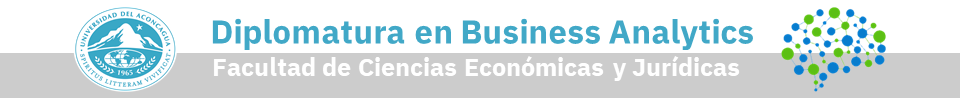

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Predicción de compra - Customer propensity to purchase

</font>
</center>

## Descripción del dataset

**El dataset pertenece a una compañía que tiene una tienda en su página web.**

**Que tan propenso a comprar puede ser un cliente potencial es muy importante para realizar acciones en el momento y campañas de re-target que aumenten el beneficio de la organización y optimizar el gasto de marketing.**


---

Administrative: El número de páginas administrativas que ha visitado el usuario.

Administrative_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

Informational: El número de páginas de información que ha visitado el usuario.

Informational_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

ProductRelated: El número de páginas de Producto que ha visitado el usuario.

ProductRelated_Duration: El tiempo que ha pasado el usuario en este tipo de páginas.

BounceRates: Porcentaje de visitantes que entran a la web mediante la página que se ingresó.

ExitRates: Porcentaje de vistas de página que terminan en la página por la que se ingresó.

PageValues: Valoración interna de la página.

SpecialDay: Cercanía en el tiempo a un día festivo.

Month: Mes.

OperatingSystems: Sistema operativo.

Browser: Navegador.

Region: Region.

TrafficType: Tipo de tráfico.

VisitorType: Tipo de visitante (nuevo o recurrente).

Weekend: True/False si es fin de semana.

Revenue: True/False si el cliente ha comprado.







Explicación de que se pretende analizar, identificar y mostrar al usuario de negocio: 
Se pretende analizar si hay relación entre varias varialbles, que son las informaciones de visitas a páginas de un grupo de clientes potenciales y si mediante el uso de un algoritmo se puede predecir la desición de compra.

¿Qué has descubierto sobre el conjunto de datos?
El conjunto de datos, no tiene datos nulos. Hay dos variables que poseen datos tipo Objet, que son Mes y Tipo de visitante. Hay datos enteros y con decimales y dos variables con datos tipo booleano, uno de ellos es Revenue, que es la variable objetivo que se quiere predecir. Se encontraron datos duplicados y se eliminaron.

# Carga de datos

In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import pandas as pd
import numpy as np

Librerias Para el desarrollo del modelo

In [ ]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import os
import pickle

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/Clientes_test.csv")

Descripción del Dataframe Train

In [ ]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9248 entries, 0 to 9247
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               9248 non-null   int64  
 1   Administrative           9248 non-null   int64  
 2   Administrative_Duration  9248 non-null   float64
 3   Informational            9248 non-null   int64  
 4   Informational_Duration   9248 non-null   float64
 5   ProductRelated           9248 non-null   int64  
 6   ProductRelated_Duration  9248 non-null   float64
 7   BounceRates              9248 non-null   float64
 8   ExitRates                9248 non-null   float64
 9   PageValues               9248 non-null   float64
 10  SpecialDay               9248 non-null   float64
 11  Month                    9248 non-null   object 
 12  OperatingSystems         9248 non-null   int64  
 13  Browser                  9248 non-null   int64  
 14  Region                  

In [ ]:
train.columns

Index(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
train.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
1,1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,False
2,2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,False
3,3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,True
4,4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [ ]:
train.isnull().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
train.describe()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000
mean,4623.500000,2.317582,82.013092,0.504650,35.032218,31.608997,1190.200830,0.022405,0.043197,5.846462,0.059840,2.123270,2.360402,3.145869,4.094399
std,2669.811978,3.310542,178.249399,1.260054,142.756676,44.415785,1944.167809,0.048772,0.048798,17.805098,0.196047,0.911189,1.729638,2.409523,4.054732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2311.750000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,4623.500000,1.000000,8.000000,0.000000,0.000000,18.000000,594.483333,0.003226,0.025254,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,6935.250000,4.000000,94.625000,0.000000,0.000000,38.000000,1463.850000,0.017143,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,9247.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,287.953793,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
train.describe(include = "all")

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248,9248.000000,9248.000000,9248.000000,9248.000000,9248,9248,9248
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485,NaN,NaN,NaN,NaN,7922,7112,7800
mean,4623.500000,2.317582,82.013092,0.504650,35.032218,31.608997,1190.200830,0.022405,0.043197,5.846462,0.059840,NaN,2.123270,2.360402,3.145869,4.094399,NaN,NaN,NaN
std,2669.811978,3.310542,178.249399,1.260054,142.756676,44.415785,1944.167809,0.048772,0.048798,17.805098,0.196047,NaN,0.911189,1.729638,2.409523,4.054732,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,2311.750000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,4623.500000,1.000000,8.000000,0.000000,0.000000,18.000000,594.483333,0.003226,0.025254,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,6935.250000,4.000000,94.625000,0.000000,0.000000,38.000000,1463.850000,0.017143,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
train.describe (include = object)

,Month,VisitorType
count,9248,9248
unique,10,3
top,May,Returning_Visitor
freq,2485,7922


In [ ]:
train.shape

(9248, 19)

In [ ]:
train.set_index('Unnamed: 0', inplace = True)
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,False
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,False
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,True
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [ ]:
train.index.name = 'Indice'
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Indice,,,,,,,,,,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,False
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,False
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,False
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,True
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [ ]:
train.shape

(9248, 18)

In [ ]:
train.drop_duplicates(inplace=True)
train.shape

(9173, 18)

In [ ]:
train['Revenue'].replace([False], 0, inplace = True)
train['Revenue'].replace([True], 1, inplace = True)
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Indice,,,,,,,,,,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0.000000,0.0,Feb,2,2,1,5,New_Visitor,False,0
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0.000000,0.0,May,3,2,6,14,New_Visitor,True,0
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,0
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,18.269401,0.0,Nov,3,2,9,2,New_Visitor,True,1
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


Eliminamos variables no relevantes

In [ ]:
train = train.drop(columns=["PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"])

In [ ]:
train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Revenue
Indice,,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.0,0.015385,0
1,3,96.000000,0,0.0,11,565.000000,0.0,0.011111,0
2,0,0.000000,0,0.0,4,25.000000,0.0,0.100000,0
3,7,133.466667,4,46.5,26,1357.833333,0.0,0.018487,1
4,4,155.500000,0,0.0,13,474.833333,0.0,0.006250,0


División del Dataframe Train

In [ ]:
y = train ["Revenue"] 
X = train.drop(columns=["Revenue"])

In [ ]:
y

Indice
0       0
1       0
2       0
3       1
4       0
       ..
9243    0
9244    0
9245    1
9246    1
9247    0
Name: Revenue, Length: 9173, dtype: int64

In [ ]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
Indice,,,,,,,,
0,0,0.000000,0,0.0,13,649.250000,0.000000,0.015385
1,3,96.000000,0,0.0,11,565.000000,0.000000,0.011111
2,0,0.000000,0,0.0,4,25.000000,0.000000,0.100000
3,7,133.466667,4,46.5,26,1357.833333,0.000000,0.018487
4,4,155.500000,0,0.0,13,474.833333,0.000000,0.006250
...,...,...,...,...,...,...,...,...
9243,3,405.166667,2,22.0,27,2042.250000,0.045977,0.067323
9244,3,18.000000,0,0.0,14,411.500000,0.000000,0.023529
9245,5,36.000000,0,0.0,237,6817.942235,0.001674,0.013806


Evaluando los Algoritmos para Train

Algoritmo Regresión Logística

In [ ]:
lr_model = linear_model.LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

Descripción del Dataframe Test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3082 non-null   int64  
 1   Administrative           3082 non-null   int64  
 2   Administrative_Duration  3082 non-null   float64
 3   Informational            3082 non-null   int64  
 4   Informational_Duration   3082 non-null   float64
 5   ProductRelated           3082 non-null   int64  
 6   ProductRelated_Duration  3082 non-null   float64
 7   BounceRates              3082 non-null   float64
 8   ExitRates                3082 non-null   float64
 9   PageValues               3082 non-null   float64
 10  SpecialDay               3082 non-null   float64
 11  Month                    3082 non-null   object 
 12  OperatingSystems         3082 non-null   int64  
 13  Browser                  3082 non-null   int64  
 14  Region                  

In [ ]:
test.columns

Index(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
test.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [ ]:
test.isnull().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
test.describe()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,1540.500000,2.307917,77.234391,0.500324,32.792575,32.098962,1208.385339,0.021550,0.042700,6.017673,0.066191,2.126217,2.347177,3.151849,3.995133
std,889.841091,3.355821,172.270712,1.300201,134.554738,44.659427,1819.324856,0.047630,0.047994,20.693205,0.207250,0.911875,1.679875,2.378016,3.934836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,770.250000,0.000000,0.000000,0.000000,0.000000,7.000000,180.750000,0.000000,0.014059,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1540.500000,1.000000,6.000000,0.000000,0.000000,18.000000,612.947917,0.002713,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,2310.750000,4.000000,90.000000,0.000000,0.000000,38.000000,1470.777083,0.016643,0.050000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
max,3081.000000,26.000000,2407.423810,16.000000,2256.916667,518.000000,23050.104140,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
test.describe(include = "all")

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082,3082.000000,3082.000000,3082.000000,3082.000000,3082,3082,3082
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879,NaN,NaN,NaN,NaN,2629,2350,2622
mean,1540.500000,2.307917,77.234391,0.500324,32.792575,32.098962,1208.385339,0.021550,0.042700,6.017673,0.066191,NaN,2.126217,2.347177,3.151849,3.995133,NaN,NaN,NaN
std,889.841091,3.355821,172.270712,1.300201,134.554738,44.659427,1819.324856,0.047630,0.047994,20.693205,0.207250,NaN,0.911875,1.679875,2.378016,3.934836,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,770.250000,0.000000,0.000000,0.000000,0.000000,7.000000,180.750000,0.000000,0.014059,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1540.500000,1.000000,6.000000,0.000000,0.000000,18.000000,612.947917,0.002713,0.025000,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,2310.750000,4.000000,90.000000,0.000000,0.000000,38.000000,1470.777083,0.016643,0.050000,0.000000,0.000000,NaN,2.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
test.describe(include = object)

,Month,VisitorType
count,3082,3082
unique,10,3
top,May,Returning_Visitor
freq,879,2629


In [ ]:
test.set_index('Unnamed: 0', inplace = True)
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [ ]:
test.index.name = 'Indice'
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Indice,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,False


In [ ]:
test.shape

(3082, 18)

In [ ]:
test['Revenue'].replace([False], 0, inplace = True)
test['Revenue'].replace([True], 1, inplace = True)
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Indice,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,0
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,0
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0.0,0.0,Feb,2,5,1,3,Returning_Visitor,False,0


Eliminamos variables no relevantes

In [ ]:
test = test.drop(columns=["PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]) 

In [ ]:
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Revenue
Indice,,,,,,,,,
0,0,0.0,0,0.0,1,0.0,0.2,0.200000,0
1,1,0.0,0,0.0,0,0.0,0.2,0.200000,0
2,0,0.0,0,0.0,3,395.0,0.0,0.066667,0
3,0,0.0,0,0.0,7,280.5,0.0,0.028571,0
4,0,0.0,0,0.0,6,98.0,0.0,0.066667,0


División del Dataframe Test

In [ ]:
y = test ["Revenue"] 
X = test.drop(columns=["Revenue"])

In [ ]:
y

Indice
0       0
1       0
2       0
3       0
4       0
       ..
3077    0
3078    0
3079    0
3080    0
3081    0
Name: Revenue, Length: 3082, dtype: int64

In [ ]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
Indice,,,,,,,,
0,0,0.00,0,0.0,1,0.00,0.200000,0.200000
1,1,0.00,0,0.0,0,0.00,0.200000,0.200000
2,0,0.00,0,0.0,3,395.00,0.000000,0.066667
3,0,0.00,0,0.0,7,280.50,0.000000,0.028571
4,0,0.00,0,0.0,6,98.00,0.000000,0.066667
...,...,...,...,...,...,...,...,...
3077,0,0.00,0,0.0,44,615.00,0.013636,0.036364
3078,6,76.25,0,0.0,22,1075.25,0.000000,0.004167
3079,0,0.00,1,0.0,16,503.00,0.000000,0.037647


Evaluando los Algoritmos para el conjunto de datos de Test

Algoritmo Regresión Logística

In [ ]:
lr_model = linear_model.LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

Predecimos en base a al conjunto de testeo

In [ ]:
prob = lr_model.predict_proba(X)

In [ ]:
y_pred_lr = lr_model.predict(X)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

Armamos la matriz de confusión y evaluamos el modelo

In [ ]:
mc = metrics.confusion_matrix(y, y_pred_lr)
print(mc)

[[2612   10]
 [ 454    6]]


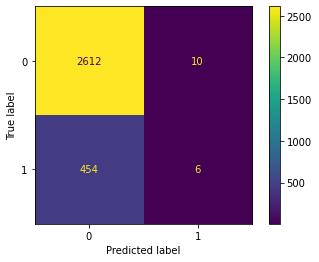

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=lr_model.classes_)
disp.plot()

In [ ]:
reporte = metrics.classification_report(y, y_pred_lr)
print(reporte)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2622
           1       0.38      0.01      0.03       460

    accuracy                           0.85      3082
   macro avg       0.61      0.50      0.47      3082
weighted avg       0.78      0.85      0.79      3082



In [ ]:
auc = metrics.roc_auc_score(y, prob[:,1])
auc

0.6674700693131694

CONCLUSIONES

En la Matriz de Confusión se observa que el Verdadero negativo es Alto, y siendo predicciones correctas, significa que el cliente ***no compra*** un alto porcentaje, en base a las variables independientes seleccionadas y utilizando este algoritmo de clasificación.

El modelo de regresión logística es medianamente bueno para predecir la varible objetivo. Dado su valor AUC, tiene un 66% de capacidad para distinguir entre las clases. 